In [42]:
import matplotlib
import matplotlib.pyplot as plt
import pickle
import torch
import math

#path = "D:\\Uni\\BA\\Development\\SigmoidGraphNetwork\\SGN_logs\\EXP_cml10"
#path = "D:\\Uni\\BA\\Development\\SigmoidGraphNetwork\\GGN_logs\\EXP_cml10"
#path = "D:\\Uni\\BA\\Development\\SigmoidGraphNetwork\\SGN_logs\\EXP_SIS_bull_5k"
#path = "D:\\Uni\\BA\\Development\\SigmoidGraphNetwork\\GGN_logs\\EXP_SIS_bull_5k"
#path = "D:\\Uni\\BA\\Development\\SigmoidGraphNetwork\\GGN_logs\\EXP_Voter_ba20_100_morecycles"
path = r'D:\Uni\BA\ColabOutputs\ba20_100_random'
print(path)

D:\Uni\BA\ColabOutputs\ba20_100_random


## Visualize training progression

In [43]:
accs = list()
losses = list()
tprs = list()
fprs = list()
timestamps = list()
for i in range(5):
    help_path = path + "/" + str(i)
    with open(help_path+'/accs.pickle', 'rb') as f:
        ls = pickle.load(f)
        accs.append(torch.tensor(ls))
    with open(help_path+'/losses.pickle', 'rb') as f:
        ls = pickle.load(f)
        losses.append(torch.tensor(ls))
    with open(help_path+'/tprs.pickle', 'rb') as f:#
        ls = pickle.load(f)
        tprs.append(torch.tensor(ls))
    with open(help_path+'/fprs.pickle', 'rb') as f:
        ls = pickle.load(f)
        fprs.append(torch.tensor(ls))
    with open(help_path+'/timestamps.pickle', 'rb') as f:
        ls = pickle.load(f)
        timestamps.append(torch.tensor(ls))
accs = torch.stack(accs)
losses = torch.stack(losses)
tprs = torch.stack(tprs)
fprs = torch.stack(fprs)
timestamps = torch.stack(timestamps)
mean_accs = accs.mean(dim=0)
mean_losses = losses.mean(dim=0)
mean_tprs = tprs.mean(dim=0)
mean_fprs = fprs.mean(dim=0)
mean_timestamps = timestamps.mean(dim=0)

In [6]:
def truncate_float(num, decimals=0):
    factor = 10.0 ** decimals
    return math.trunc(factor*num) / factor

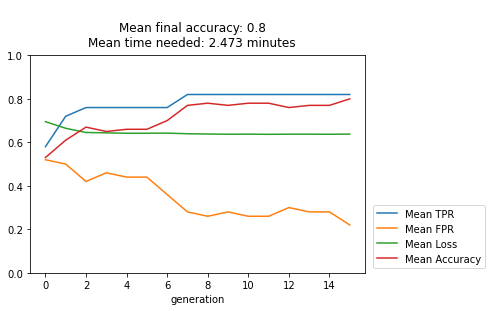

In [10]:
x = range(mean_tprs.size()[0])
fig, ax1 = plt.subplots()

ax1.set_xlabel('generation')
#ax1.set_ylabel('TPR/FPR')
ax1.plot(x, mean_tprs.numpy(), label='Mean TPR')
ax1.plot(x, mean_fprs.numpy(), label='Mean FPR')
ax1.plot(x, mean_losses.numpy(), label='Mean Loss')
ax1.plot(x, mean_accs.numpy(), label='Mean Accuracy')
ax1.set_ylim([0.0,1.0])
#ax1.legend(loc='right')
ax1.legend(loc='lower left', bbox_to_anchor=[1.01, 0])

fig.patch.set_facecolor('xkcd:white')
fig.suptitle('\nMean final accuracy: ' + str(truncate_float(mean_accs.numpy()[-1], 5)) +
             '\nMean time needed: ' + str(truncate_float(mean_timestamps.numpy()[-1] / 60, 3)) + ' minutes', y = 1.05)

plt.show()

In [11]:
fig.savefig('./tracker_figures/EXP_SIS_bull_5k/GGN.png', bbox_inches='tight', pad_inches=0.5, dpi=300)

## Output for Proposal Talk

In [48]:
print(mean_accs[-4])
#print(mean_timestamps.numpy()[-1])
print(accs[:, -4])

tensor(0.9137)
tensor([0.9211, 0.9053, 0.9105, 0.9000, 0.9316])
